# Project Report (Group 93)
## Water Potability



### Methods & Results

- Q. describe in written English the methods you used to perform your analysis from beginning to end that narrates the code the does the analysis.
(https://www.kaggle.com/datasets/adityakadiwal/water-potability) 

### Exploratory Data Analysis

In [74]:
library(repr)
library(tidyverse)
library(tidymodels)
library(digest)
library(ISLR)


In [75]:
set.seed(2023)
#1. READ DATA
url <- "https://raw.githubusercontent.com/Swapnil-Dubey/Dsci100_Group93_/main/data/water_potability.csv"
water_potability_raw <- read_csv(url) #unedited "raw" dataset
nrow(water_potability_raw) #show number of observations in the raw dataset.
head(water_potability_raw)

Rows: 3276 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (10): ph, Hardness, Solids, Chloramines, Sulfate, Conductivity, Organic_...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] 3276

ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
NA,204.8905,20791.32,7.300212,368.5164,564.3087,10.379783,86.99097,2.963135,0
3.716080,129.4229,18630.06,6.635246,NA,592.8854,15.180013,56.32908,4.500656,0
8.099124,224.2363,19909.54,9.275884,NA,418.6062,16.868637,66.42009,3.055934,0
8.316766,214.3734,22018.42,8.059332,356.8861,363.2665,18.436524,100.34167,4.628771,0
9.092223,181.1015,17978.99,6.546600,310.1357,398.4108,11.558279,31.99799,4.075075,0
5.584087,188.3133,28748.69,7.544869,326.6784,280.4679,8.399735,54.91786,2.559708,0


In [76]:
#2. CLEAN DATA AND REMOVE NA ROWS
water_potability_clean <- water_potability_raw |>
    rename(hardness = Hardness, solids = Solids, chloramines = Chloramines, sulfate = Sulfate, conductivity = Conductivity, organic_carbon = Organic_carbon, trihalomethanes = Trihalomethanes, turbidity = Turbidity, potability = Potability) |>
    mutate(potability = as_factor(potability)) |>
    na.omit()


nrow(water_potability_clean) #number of observations in the cleaned dataset (NA removed)
head(water_potability_clean)

[1] 2011

ph,hardness,solids,chloramines,sulfate,conductivity,organic_carbon,trihalomethanes,turbidity,potability
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
8.316766,214.3734,22018.42,8.059332,356.8861,363.2665,18.436524,100.34167,4.628771,0
9.092223,181.1015,17978.99,6.546600,310.1357,398.4108,11.558279,31.99799,4.075075,0
5.584087,188.3133,28748.69,7.544869,326.6784,280.4679,8.399735,54.91786,2.559708,0
10.223862,248.0717,28749.72,7.513408,393.6634,283.6516,13.789695,84.60356,2.672989,0
8.635849,203.3615,13672.09,4.563009,303.3098,474.6076,12.363817,62.79831,4.401425,0
11.180284,227.2315,25484.51,9.077200,404.0416,563.8855,17.927806,71.97660,4.370562,0


In [77]:
#3. CREATE TRAINING DATA
water_split <- water_potability_clean |> #split the data 0.75/0.25
    initial_split(prop = 0.75, strata = potability) 


water_train <- training(water_split)  #set the 0.75 split as the training data
water_test<-testing(water_split)

In [78]:
#4. SUMMARIZE DATA IN A TABLE
water_train_means <- water_train |> #find means for all predictors grouped by potability
    group_by(potability) |>
    summarize(across(ph:turbidity, mean, na.rm=TRUE))

water_train_nrows <- water_train |> #count number of observations in the two groups
    group_by(potability) |>
    summarize(n = n())

water_train_summary <- water_train_means |> #merge grouped n dataframe with grouped means dataframe
    merge(water_train_nrows)

water_train_summary

potability,ph,hardness,solids,chloramines,sulfate,conductivity,organic_carbon,trihalomethanes,turbidity,n
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
0,7.041711,196.2666,21591.49,7.102538,334.1355,427.0587,14.43886,65.94446,3.969137,900
1,7.123942,196.7239,22352.82,7.195704,331.1790,422.0726,14.38643,66.82991,3.984172,608


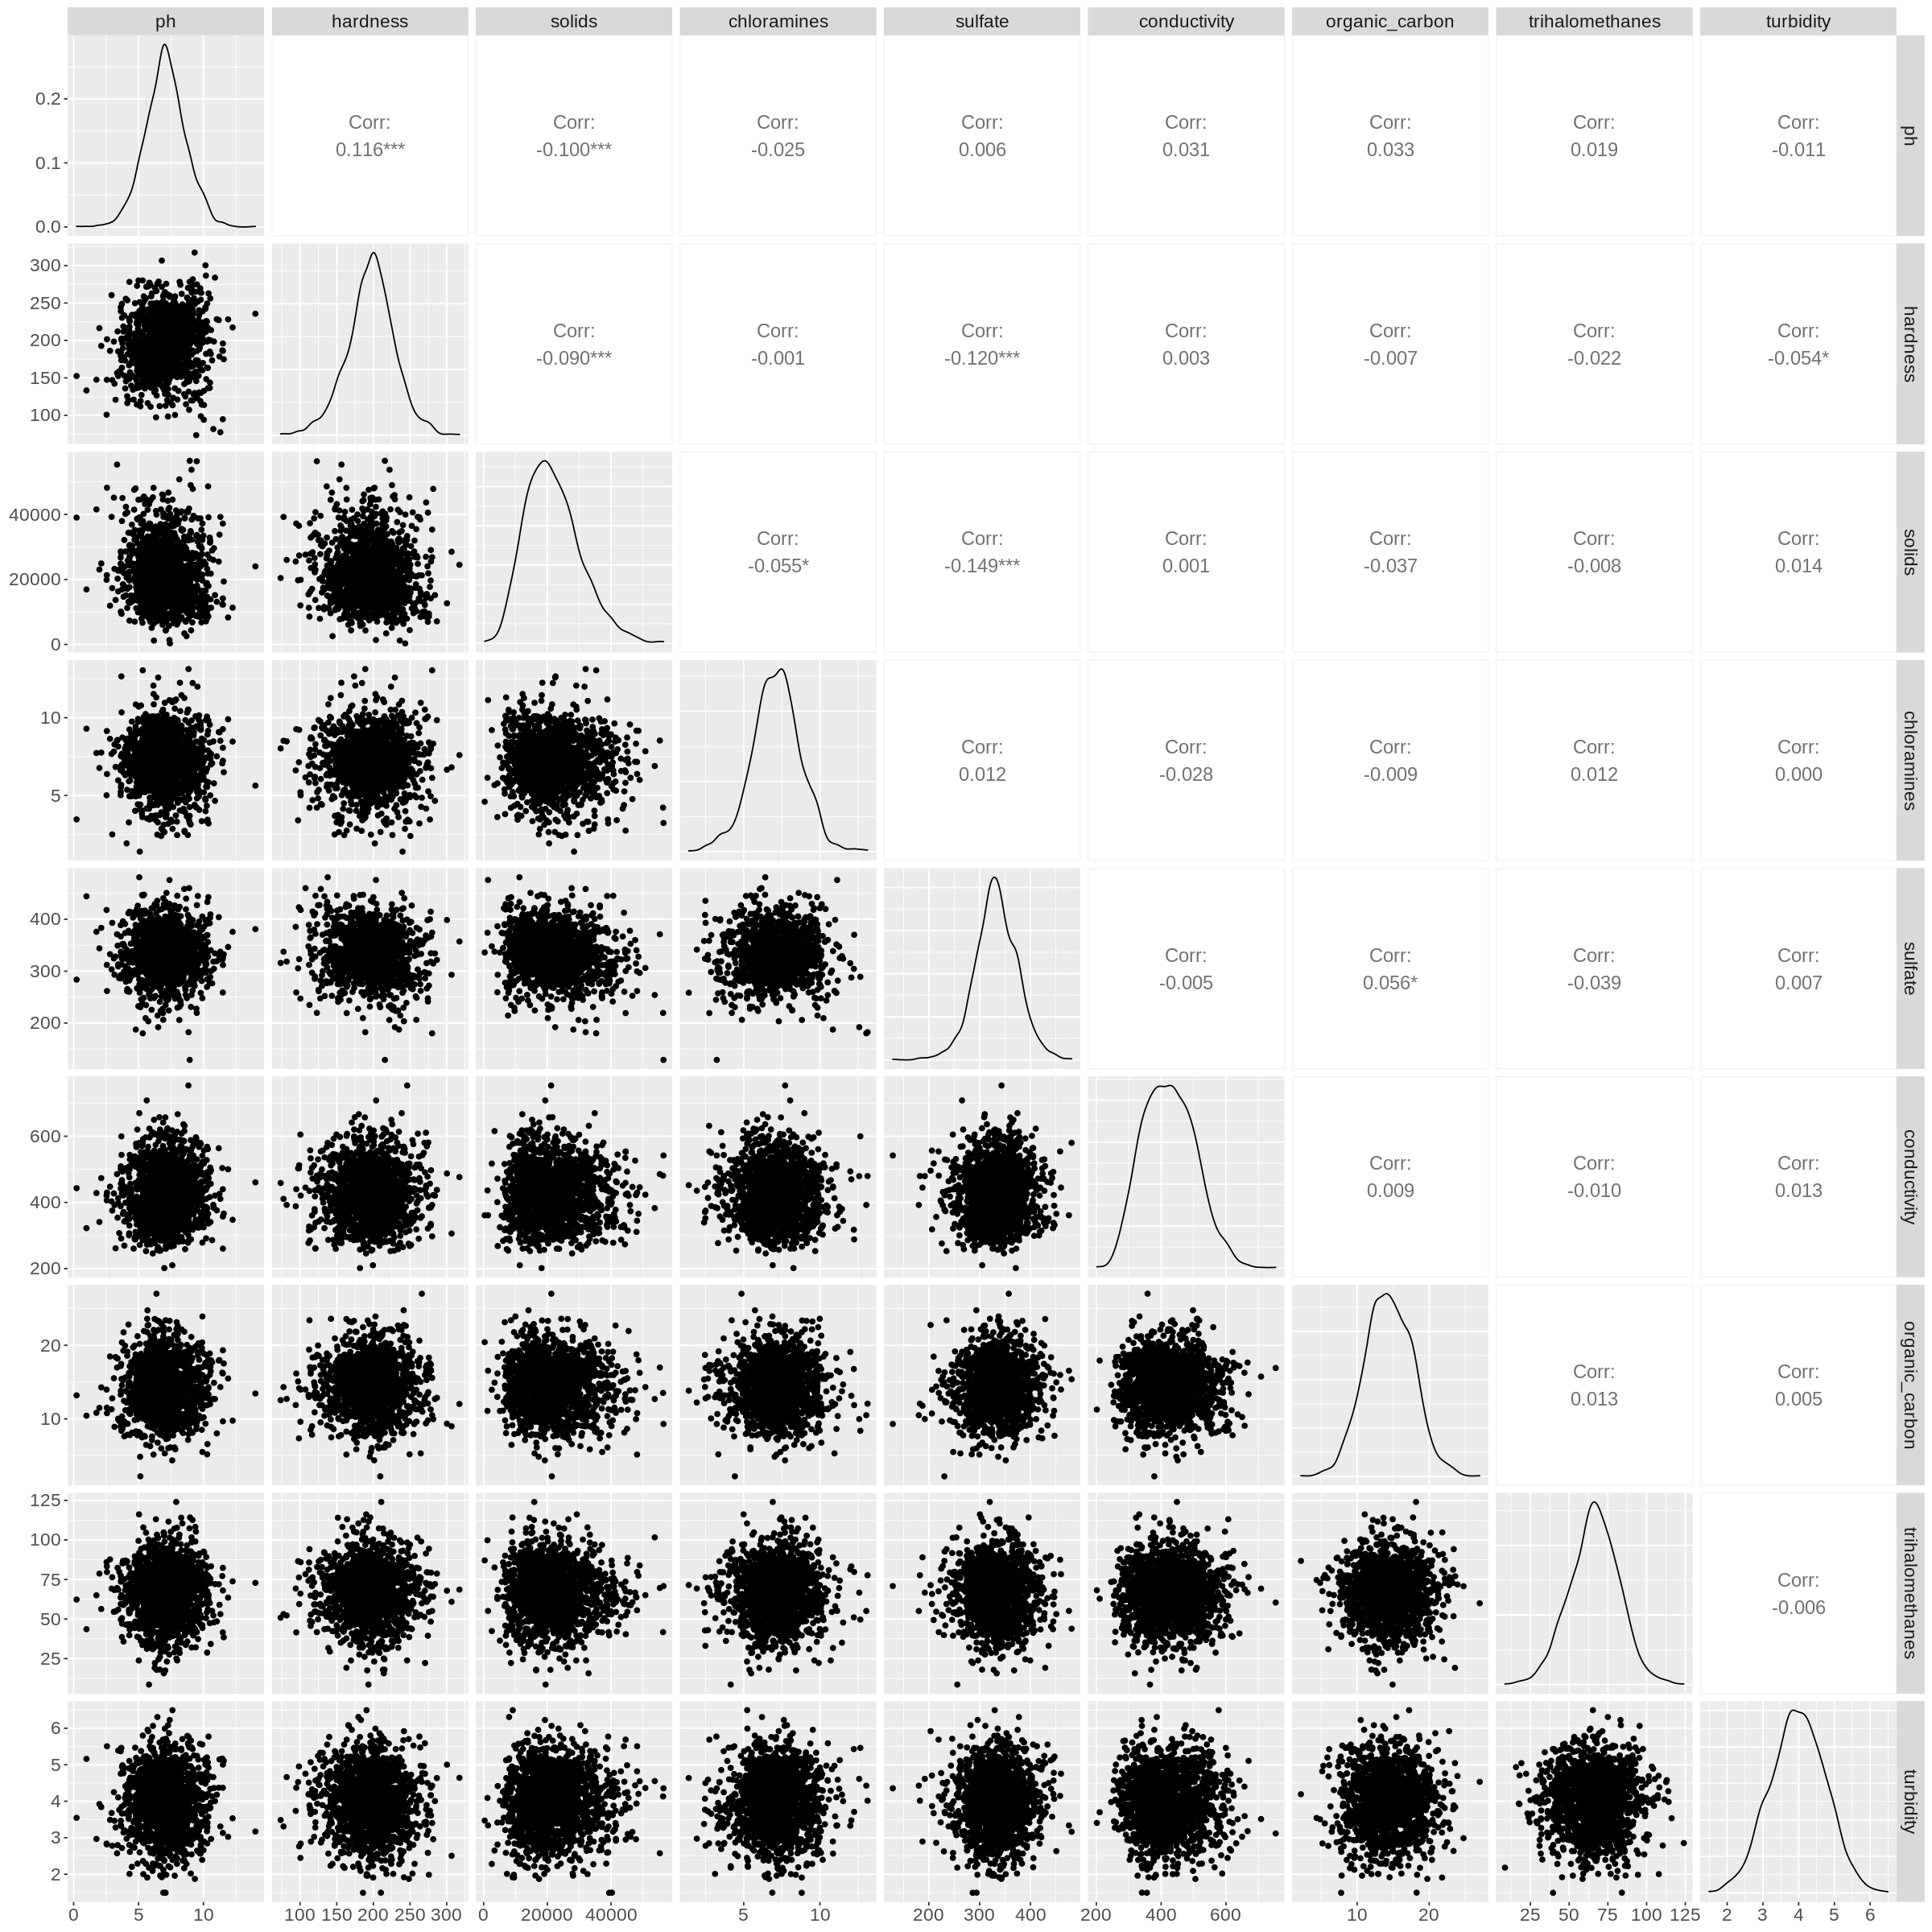

In [80]:
options(repr.plot.width = 20, repr.plot.height = 20)

water_eda<- water_train|>

select(-potability)|>

ggpairs(upper = list(continuous = wrap("cor", size = 5)))+ theme(text = element_text(size = 17))

water_eda

In [81]:
summary(water_train)

       ph             hardness          solids         chloramines    
 Min.   : 0.2275   Min.   : 73.49   Min.   :  320.9   Min.   : 1.391  
 1st Qu.: 6.0767   1st Qu.:177.55   1st Qu.:15585.0   1st Qu.: 6.164  
 Median : 7.0422   Median :198.08   Median :20844.8   Median : 7.145  
 Mean   : 7.0749   Mean   :196.45   Mean   :21898.5   Mean   : 7.140  
 3rd Qu.: 8.0515   3rd Qu.:216.66   3rd Qu.:27165.8   3rd Qu.: 8.144  
 Max.   :14.0000   Max.   :317.34   Max.   :56488.7   Max.   :13.127  
    sulfate       conductivity   organic_carbon  trihalomethanes  
 Min.   :129.0   Min.   :201.6   Min.   : 2.20   Min.   :  8.577  
 1st Qu.:306.8   1st Qu.:363.9   1st Qu.:12.17   1st Qu.: 55.691  
 Median :332.5   Median :422.2   Median :14.32   Median : 66.672  
 Mean   :332.9   Mean   :425.0   Mean   :14.42   Mean   : 66.301  
 3rd Qu.:360.3   3rd Qu.:481.0   3rd Qu.:16.84   3rd Qu.: 77.137  
 Max.   :481.0   Max.   :753.3   Max.   :27.01   Max.   :124.000  
   turbidity     potability
 Min. 